In [1]:
!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [2]:
import prince
import pandas as pd
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# supress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")
#set all floats to max of 3 decimals
pd.options.display.float_format = "{:,.3f}".format

### Import the HR data set 

In [3]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/hr_dataset.csv'

In [4]:
data = pd.read_csv(data_url)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    int64  
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.500,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.000,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.000,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.500,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.560,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [5]:
data['Zip'] = data['Zip'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    object 
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non

### Pull out the categorical variables and note the dimensions of the data set.

In [6]:
cat_vars = data.select_dtypes(exclude='number')
num_vars = data.select_dtypes(include='number')
cat_vars.shape

(310, 14)

### Reduce these categorical features down to two dimensions using MCA.

In [7]:
mca = prince.MCA()
mca.fit(cat_vars)
coordinates = mca.transform(cat_vars)
coordinates

,0,1
0,0.078,0.152
1,0.305,0.173
2,0.124,0.267
3,0.031,0.072
4,0.265,0.061
...,...,...
305,-0.009,1.941
306,-0.040,1.599
307,-0.009,1.534
308,-0.030,1.724


### Plot the coordinates of each resulting dimension.

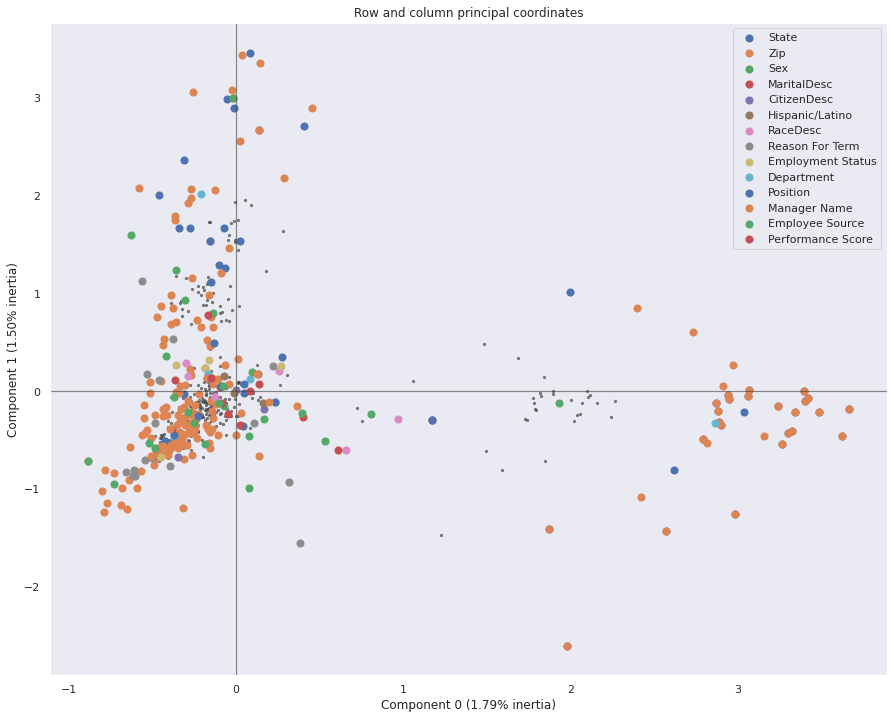

In [8]:
mca.plot_coordinates(X=cat_vars, ax=None, figsize=(15,12), show_row_points=True, row_points_size=5, 
                     show_row_labels=False,show_column_points=True, column_points_size=50, show_column_labels=False,)
plt.show()

### One hot encode the categorical features and note the change in dimensions in the data set.

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
df_encoded = encoder.fit_transform(cat_vars).toarray()


### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [23]:
ca = prince.CA()
ca.fit(df_encoded)
coordinates = ca.transform(df_encoded)
coordinates

,0,1
0,-0.004,0.069
1,0.360,0.144
2,0.023,0.206
3,-0.007,-0.018
4,0.271,-0.009
...,...,...
305,-0.162,2.049
306,-0.177,1.660
307,-0.137,1.567
308,-0.165,1.766


### Plot the coordinates of each resulting dimension.

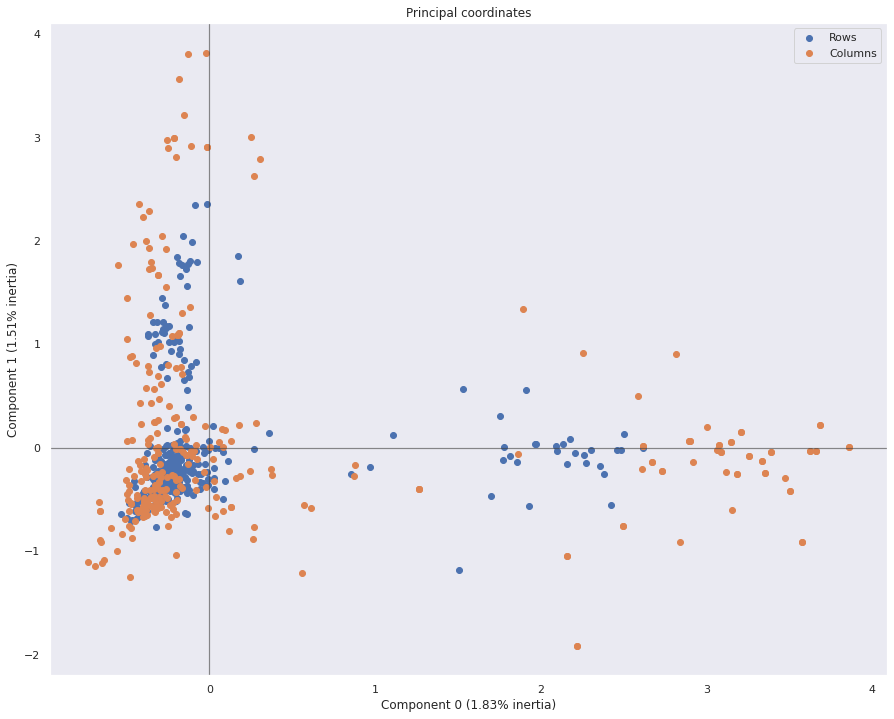

In [29]:
ca.plot_coordinates(X=df_encoded,ax=None, 
                    figsize=(15, 12), 
                    show_row_labels=False,
                    show_col_labels=False
 )
plt.show()

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [9]:
famd = prince.FAMD()
famd.fit(data)
coordinates = famd.transform(data)
coordinates

,0,1
0,0.746,2.229
1,-0.093,0.336
2,0.023,-0.243
3,-1.003,-1.374
4,-0.824,-0.392
...,...,...
305,1.123,-2.077
306,0.922,-2.145
307,0.726,-2.078
308,0.641,-2.333


### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

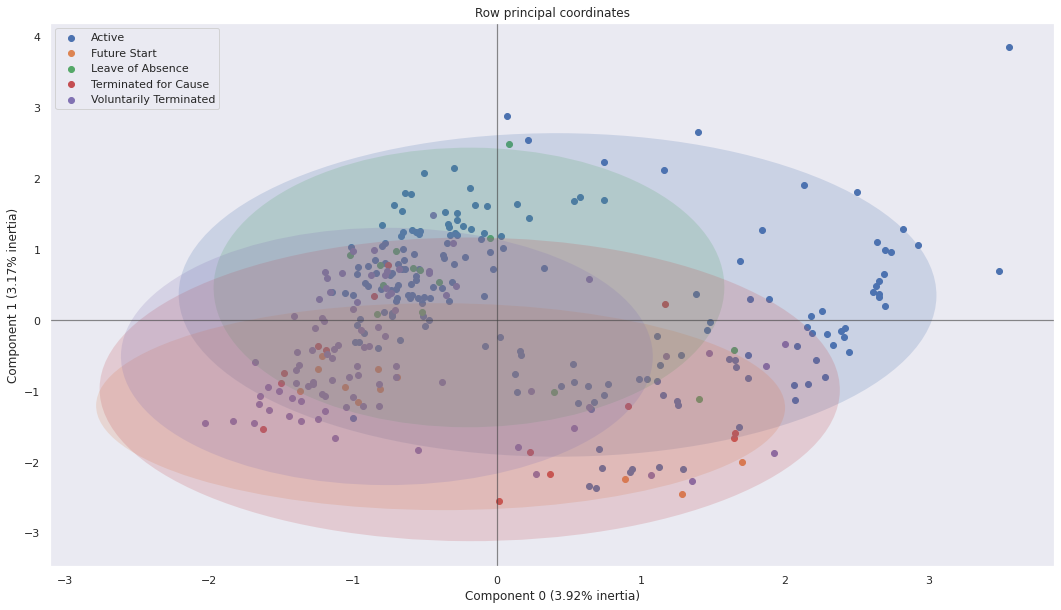

In [14]:
famd.plot_row_coordinates(
    data,
    color_labels=data['Employment Status'],
    ellipse_fill=True, 
    figsize=(18,10),
)
plt.show()